<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Fajardo, Donna Mae O.<br>
    201913332 <br>
   Section </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

<span style="font-family: Century Gothic">

Beba Ng owner of Bebang's donut reached out once again to ask for help with her business. She was given the csv file of the last year's monthly sales data from her business. What she needs to know are: <br>
-  What are he monthly revenues, costs, and profits?

-         How much profit did she get for each flavor? And which are the top 3 and bottom 3 flavors?

-          Is there anything she could improve on marketing or advertising? <br>
<br>She also requests to provide some graphs or charts from the results of the sales data but it is completely optional. </span>

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [1]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [2]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [3]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0] ## reshape this vector to the appropriate size
costs_mat = np.array(df_prices)[1] ## reshape this vector to the appropriate size

prices_mat=prices_mat.reshape(-1,1) #reshaping the vector
costs_mat=costs_mat.reshape(-1,1) #reshaping the vector

## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [4]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue =sales*price
    monthly_costs = sales*cost
    monthly_profits =monthly_revenue-monthly_costs  
    return monthly_revenue, monthly_costs, monthly_profits

In [5]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
#Created a dataframe for montly revenue, montly cost and monthly profit
mr =pd.DataFrame(month_rev, index=None, columns=['January','February','March','April','May','June','July','August','September','October','November','December'])
mc =pd.DataFrame(month_cost, index=None, columns=['January','February','March','April','May','June','July','August','September','October','November','December'])
mp =pd.DataFrame(month_profit, index=None, columns=['January','February','March','April','May','June','July','August','September','October','November','December'])

#The sum of every month
monthly_rev=[mr['January'].sum(),mr['February'].sum(),mr['March'].sum(),mr['April'].sum(),mr['May'].sum(),mr['June'].sum(),mr['July'].sum(),mr['August'].sum(),mr['September'].sum(),mr['October'].sum(),mr['November'].sum(),mr['December'].sum(),]
monthly_cost=[mc['January'].sum(),mc['February'].sum(),mc['March'].sum(),mc['April'].sum(),mc['May'].sum(),mc['June'].sum(),mc['July'].sum(),mc['August'].sum(),mc['September'].sum(),mc['October'].sum(),mc['November'].sum(),mc['December'].sum(),]
monthly_profit=[mp['January'].sum(),mp['February'].sum(),mp['March'].sum(),mp['April'].sum(),mp['May'].sum(),mp['June'].sum(),mp['July'].sum(),mp['August'].sum(),mp['September'].sum(),mp['October'].sum(),mp['November'].sum(),mp['December'].sum(),]

#Combining the sum of montly revenue, montly cost and monthly profit 
results=pd.DataFrame([monthly_rev,monthly_cost,monthly_profit],index=['Montlhy revenue','Monthly Cost','Monthly Profit'], columns=['January','February','March','April','May','June','July','August','September','October','November','December'])

#Styling and printing dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
results.style.set_table_styles([{'selector' : '',  'props' : [('border', '3px solid black')]}]) 


,January,February,March,April,May,June,July,August,September,October,November,December
Montlhy revenue,236825,175530,159045,30335,150085,16735,17970,16995,14960,21590,213655,347365
Monthly Cost,157454,116322,105195,20334,97261,11208,12372,11497,9926,14377,137107,230209
Monthly Profit,79371,59208,53850,10001,52824,5527,5598,5498,5034,7213,76548,117156


## Part 2: Flavor Sales

In [6]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = sales*price
    flavor_costs = sales*cost
    flavor_profits =flavor_revenue-flavor_costs
    return flavor_profits

In [7]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
#Created dataframe for flavor profit
flavor_profit=pd.DataFrame(flavor_profit, index=['Red Velvet','Oreo','Sugar Glazed','Almond Honey','Matcha','Strawberry Cream','Brown Sugar boba','Fruits and nuts','Dark Chocolate','Chocolate and Orange','Choco Mint','Choco Butter Naught'], columns=['January','February','March','April','May','June','July','August','September','October','November','December'])
flavor_profit.index.name='Flavors' #added an index name for the rows

#Styling and printing Dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
flavor_profit.style.set_table_styles([{'selector' : '',  'props' : [('border', '3px solid black')]}]) 

,January,February,March,April,May,June,July,August,September,October,November,December
Flavors,,,,,,,,,,,,
Red Velvet,7810,5240,3640,1570,8940,560,890,410,230,780,2310,8990
Oreo,2100,3240,3440,320,1230,10,30,0,10,60,3120,5480
Sugar Glazed,5990,6740,8540,140,4670,780,360,480,750,980,7810,16020
Almond Honey,1860,1680,1710,345,2970,180,480,615,345,540,4500,8490
Matcha,9675,7470,13275,1470,2655,1470,645,1440,390,1065,8235,13455
Strawberry Cream,1890,3348,3321,702,1467,234,405,198,486,369,1863,4104
Brown Sugar boba,9810,3800,1540,140,1470,150,980,330,230,360,5520,6330
Fruits and nuts,9560,9240,7080,980,1780,0,20,0,20,160,6700,4280
Dark Chocolate,8970,3045,540,1440,11835,60,75,0,120,0,11835,6870


In [10]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
flavor_profit['Total Sales']=flavor_profit.sum(axis=1) #Getting the total sales of each flavor
#(optional) to sort out the data
arranged=flavor_profit.sort_values(by=['Flavors']) #Sorting the flavors alphabetically 

best_3_flavors =flavor_profit.nlargest(3,'Total Sales') # Top 3 best flavors
worst_3_flavors=flavor_profit.nsmallest(3,'Total Sales') # Top 3 worst flavors

#Getting the best and worst three flavors by using the sorted data
#best_3_flavors =arranged.head(3)
#worst_3_flavors=arranged.tail(3)

In [11]:
#Dataframe table with Total Sales included (Sorted by Flavors alphabetically)
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color
arranged.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['Total Sales']])

,January,February,March,April,May,June,July,August,September,October,November,December,Total Sales
Flavors,,,,,,,,,,,,,
Almond Honey,1860,1680,1710,345,2970,180,480,615,345,540,4500,8490,47430
Brown Sugar boba,9810,3800,1540,140,1470,150,980,330,230,360,5520,6330,61320
Choco Butter Naught,10892,8204,9030,1400,13818,882,504,1246,1092,1386,10976,32340,183540
Choco Mint,5954,5356,1014,1014,1014,91,39,104,26,13,4199,7332,52312
Chocolate and Orange,4860,1845,720,480,975,1110,1170,675,1335,1500,9480,3465,55230
Dark Chocolate,8970,3045,540,1440,11835,60,75,0,120,0,11835,6870,89580
Fruits and nuts,9560,9240,7080,980,1780,0,20,0,20,160,6700,4280,79640
Matcha,9675,7470,13275,1470,2655,1470,645,1440,390,1065,8235,13455,122490
Oreo,2100,3240,3440,320,1230,10,30,0,10,60,3120,5480,38080


In [12]:
best_3_flavors.style.set_caption("3 Best Flavors of Bebang's Donuts") #print with caption

,January,February,March,April,May,June,July,August,September,October,November,December,Total Sales
Flavors,,,,,,,,,,,,,
Choco Butter Naught,10892,8204,9030,1400,13818,882,504,1246,1092,1386,10976,32340,183540
Matcha,9675,7470,13275,1470,2655,1470,645,1440,390,1065,8235,13455,122490
Sugar Glazed,5990,6740,8540,140,4670,780,360,480,750,980,7810,16020,106520


In [13]:
worst_3_flavors.style.set_caption("3 Worst Flavors of Bebang's Donuts")#print with caption

,January,February,March,April,May,June,July,August,September,October,November,December,Total Sales
Flavors,,,,,,,,,,,,,
Strawberry Cream,1890,3348,3321,702,1467,234,405,198,486,369,1863,4104,36774
Oreo,2100,3240,3440,320,1230,10,30,0,10,60,3120,5480,38080
Almond Honey,1860,1680,1710,345,2970,180,480,615,345,540,4500,8490,47430


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

Text(0, 0.5, 'Price')

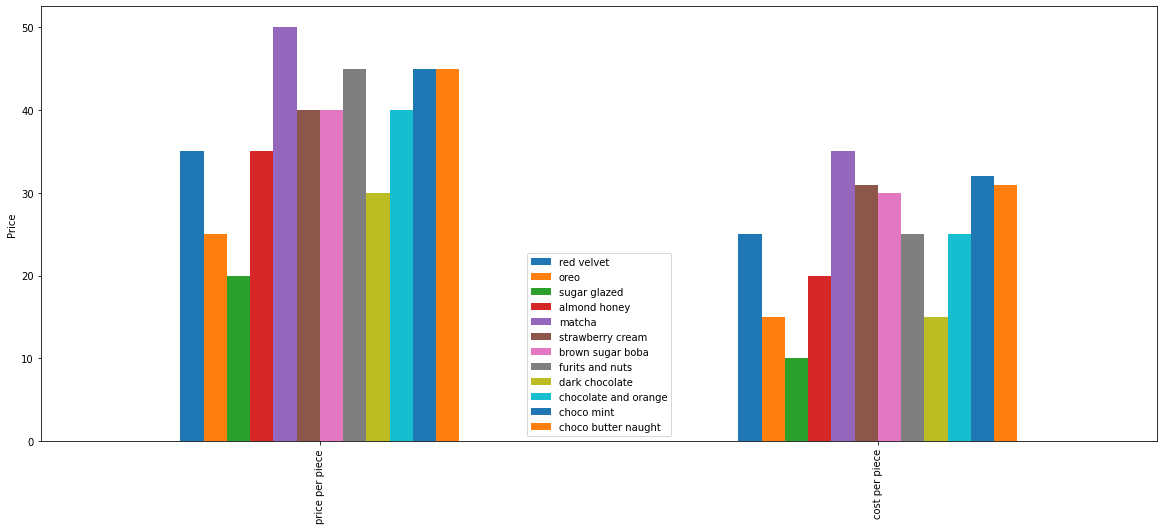

In [19]:
df = pd.DataFrame(df_prices)
prices = df.plot.bar(figsize=(20,8)) 
prices.set_ylabel("Price") 

Text(0, 0.5, 'sales')

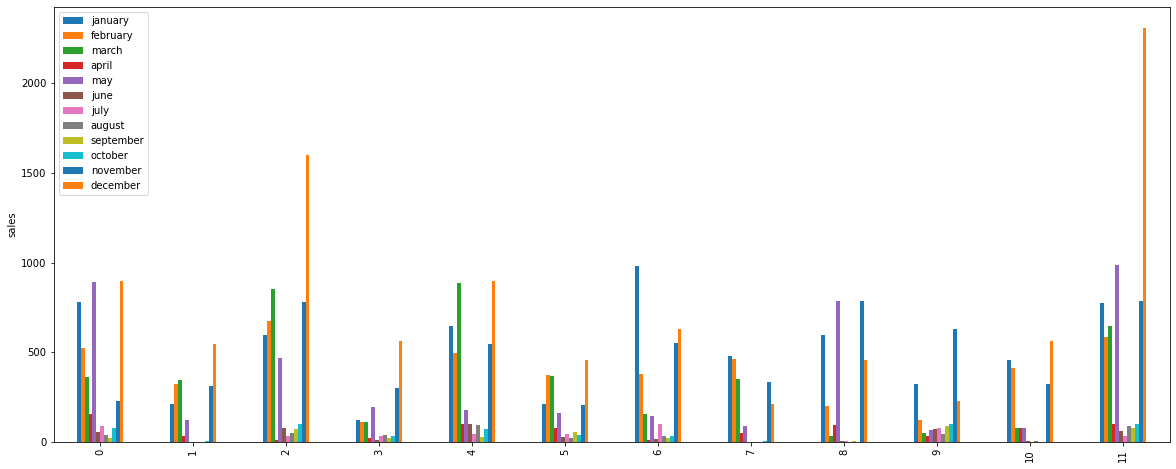

In [16]:
df = pd.DataFrame(df_sales)
sales= df.plot.bar(figsize=(20,8)) 
sales.set_ylabel("sales") 

#### Monthly Sales

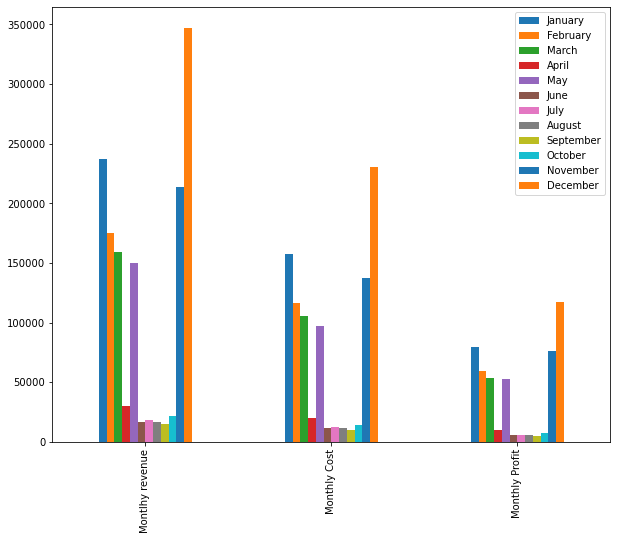

In [17]:
df = pd.DataFrame(results)
results = df.plot.bar(figsize=(10,8))

#### Flavor Sales

Text(0, 0.5, 'Flavor Sales')

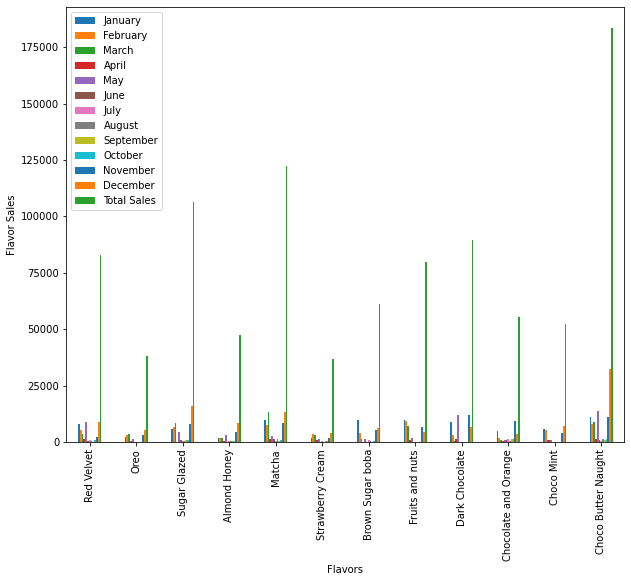

In [18]:
df=pd.DataFrame(flavor_profit)
flavor_profit=df.plot.bar(figsize=(10,8))
flavor_profit.set_ylabel("Flavor Sales")

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

<span style="font-family: Century Gothic">

**Dear Client Beba Ng,**<br>
<p>Based on the data gathered and results the most sales you have are during December and January. Your three top best flavors are Choco Butter Naught, Matcha, and Glazed. While your three worst flavors are Strawberry Cream, Oreo, and Almond Honey. I recommend based on the results, that during your peak months (December and January) to provide some promo. Your promo can contain 2 best flavors and 1 of the worst flavor. So that your least favorite flavor of your donut can still be sold and able to produce. Also, knowing your three worst flavors you could improve them and observe for the next couple of months if the sales have improved but if not you could pull it out from the menu and produce a new flavor or lessen the price or produce a promo for those three that can entice the costumers. Also, the month of February and November is promising as per these two months are next to the peak months. By this time you could subtle introduce new promos that will gradually be much better until the peak months. </p>

**Thank you,**<br>
Fajardo, Donna Mae O.<br>
CpE</span>